In [ ]:
import pandas as pd
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
df= pd.read_csv("/WineQT.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.shape

(1143, 13)

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


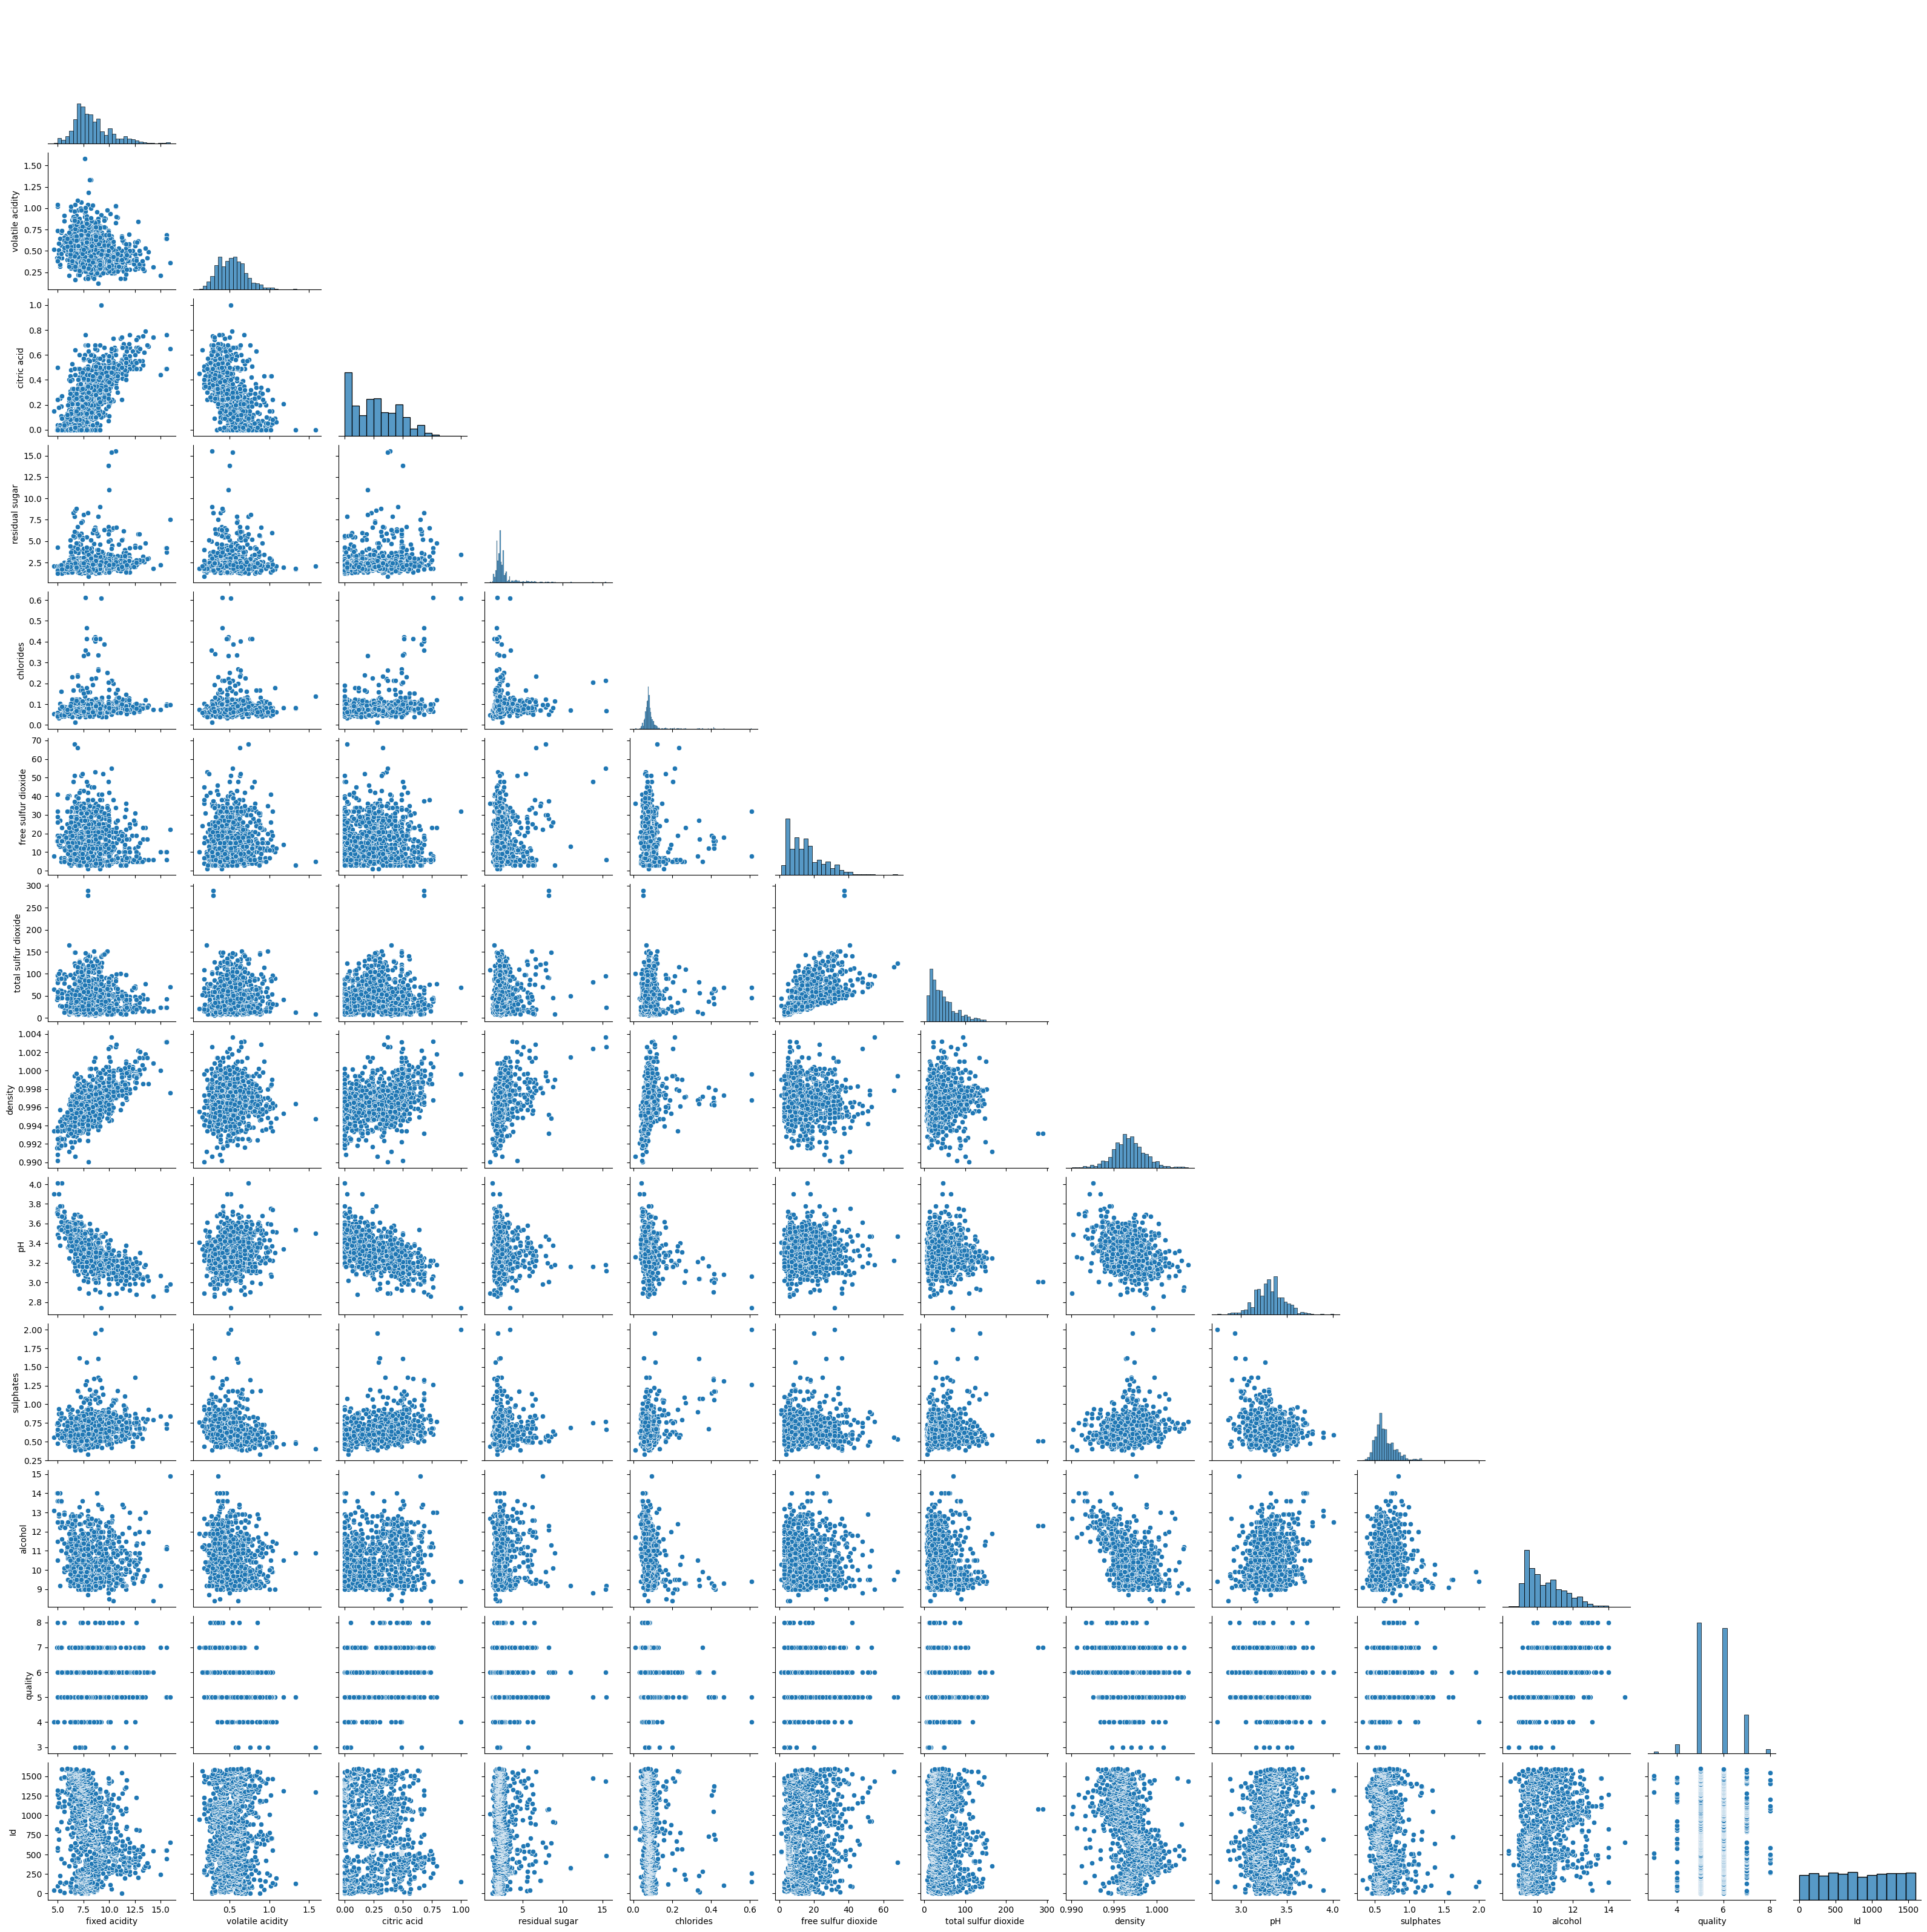

In [ ]:
import seaborn as sns
sns.pairplot(df, corner=True);

In [ ]:
import numpy as np
X = df.drop('quality', axis=1).values
y = df['quality'].values
mean_values = np.mean(X, axis=0)
print("Mean of Features: ", mean_values)
std_values = np.std(X, axis=0)
print("Standard Deviation of Features: ", std_values)
X[np.isnan(X)] = np.nanmean(X)

Mean of Features:  [8.31111111e+00 5.31338583e-01 2.68363955e-01 2.53215223e+00
 8.69326334e-02 1.56154856e+01 4.59146982e+01 9.96730411e-01
 3.31101487e+00 6.57707787e-01 1.04421114e+01 8.04969379e+02]
Standard Deviation of Features:  [1.74683037e+00 1.79554596e-01 1.96599794e-01 1.35532420e+00
 4.72466566e-02 1.02460011e+01 3.27677868e+01 1.92422483e-03
 1.56595513e-01 1.70324158e-01 1.08172210e+00 4.63794099e+02]


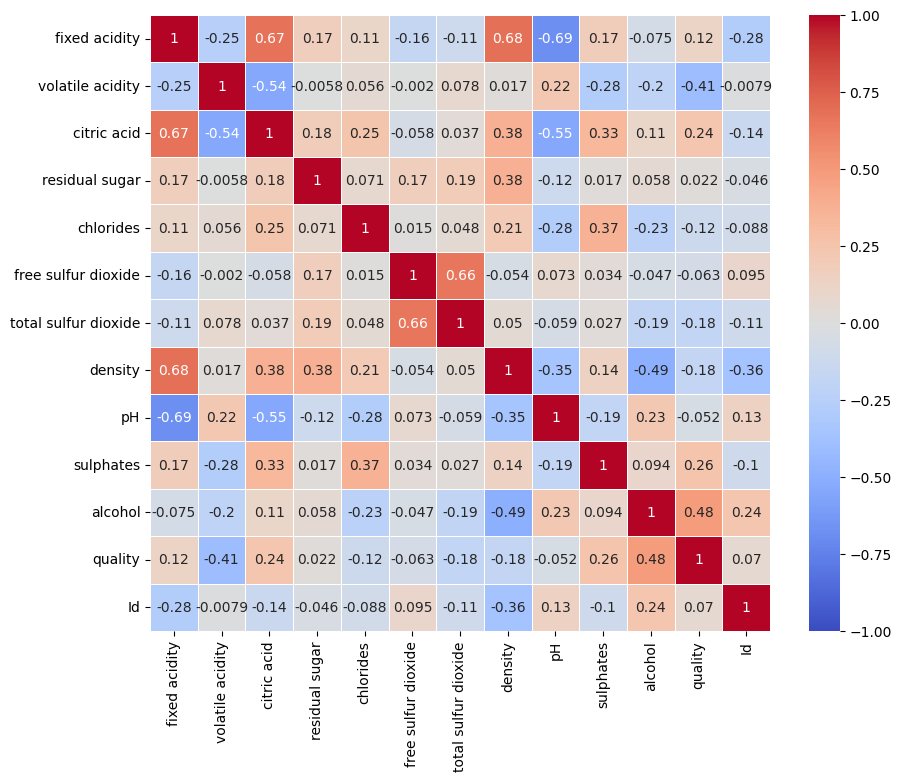

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           linewidths=0.5,
           annot=True,
           cmap="coolwarm")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

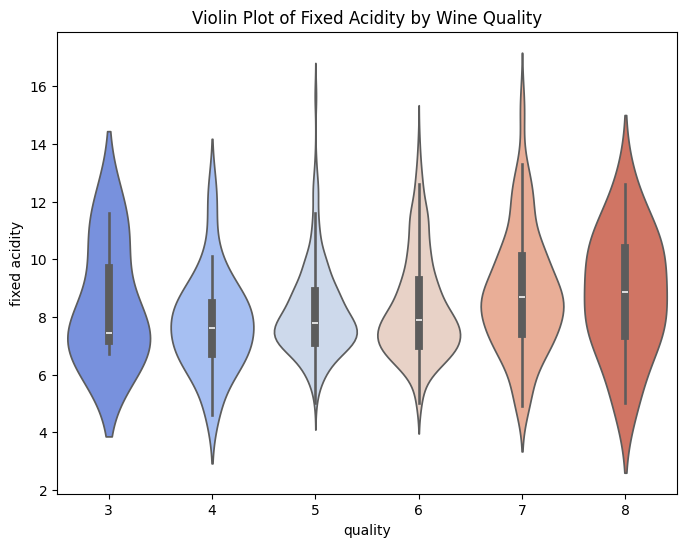

In [ ]:
# Violin plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='fixed acidity', data=df, palette='coolwarm')
plt.title('Violin Plot of Fixed Acidity by Wine Quality')
plt.show

In [ ]:
df.quality.value_counts().sort_index()

,count
quality,
3,6
4,33
5,483
6,462
7,143
8,16


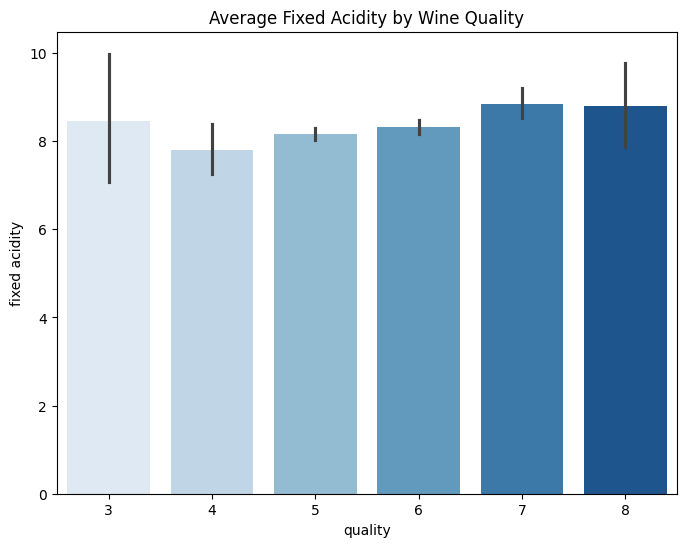

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='fixed acidity', data=df, palette='Blues')
plt.title('Average Fixed Acidity by Wine Quality')
plt.show()


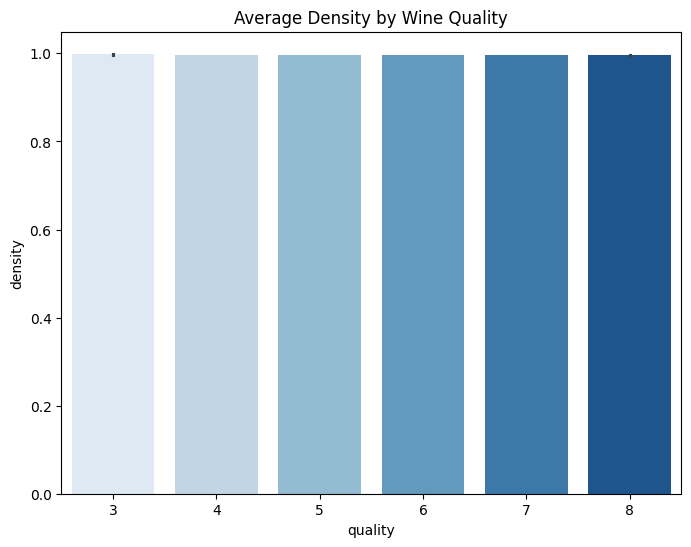

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='density', data=df, palette='Blues')
plt.title('Average Density by Wine Quality')
plt.show()

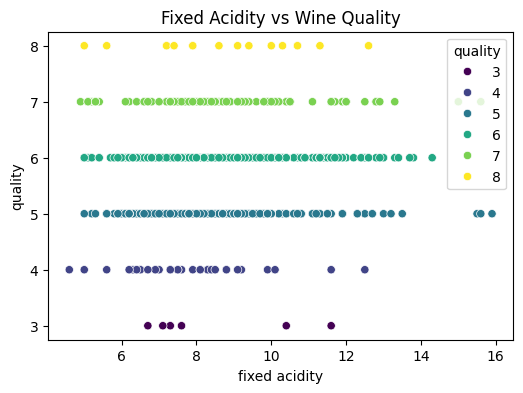

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='fixed acidity', y='quality', data=df, hue='quality', palette='viridis')
plt.title('Fixed Acidity vs Wine Quality')
plt.show()


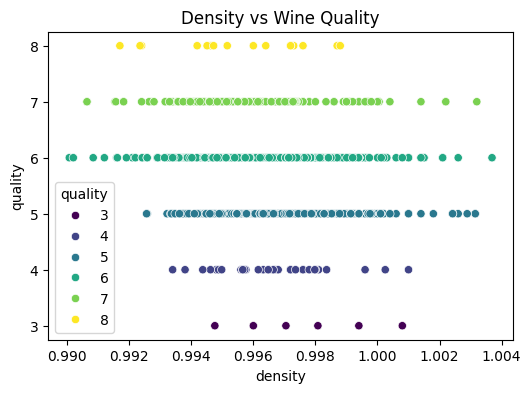

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='density', y='quality', data=df, hue='quality',palette='viridis')
plt.title('Density vs Wine Quality')
plt.show()

# **Conclusion**

In this project, we dove into the Wine Quality Prediction dataset, using data analysis and machine learning to predict the quality of wine based on its ch

Data Analysis:  We started by exploring the data, running descriptive statistics, and visualizing relationships between key chemical features like acidity, alcohol content, and density. Through correlation analysis, we identified the strongest predictors of wine quality, revealing some interesting patterns in the data.

**Modeling and Evaluation:** To predict wine quality, we tested three classification models: Random Forest, Stochastic Gradient Descent (SGD), and Support Vector Classifier (SVC). After optimizing each model, we evaluated them using metrics like accuracy and F1-score. The Random Forest Classifier stood out as the top performer, thanks to its ability to capture complex patterns in the data.

**Insights and Applications:** We discovered that certain features, such as alcohol content and density, have a strong influence on wine quality. This is valuable information for winemakers, as it suggests that adjusting these factors could help improve the overall quality of the wine. The insights from this analysis could be useful in viticulture and quality control processes.

**Challenges:** Of course, there were challenges along the way. One of the main issues was dealing with class imbalances in the dataset. We also had to fine-tune the models to avoid overfitting. Looking ahead, there are opportunities to improve the models further, perhaps by using techniques like oversampling or exploring ensemble methods to boost performance even more.